**VISTA GENERAL DEL DATASET**

In [2]:
!pip install python-dotenv -q
!pip install nltk unidecode -q
!pip install textblob -q
!python -m textblob.download_corpora -q
!pip install wordcloud matplotlib -q






   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.8 MB/s eta 0:00:00
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [3]:
#importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
import sys

In [4]:
# Cargar los datos
load_dotenv()
df = pd.read_csv('comentarios.csv')

In [5]:
#obtener los primeros datos del dataframe
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.columns

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')

In [7]:
# Obtener la dimensión del dataframe
dimension = df.shape
print("Dimensión del dataframe:", dimension)

# Obtener el tipo de datos de cada columna
tipos_de_datos = df.dtypes
print("Tipos de datos del dataframe:")
print(tipos_de_datos)

Dimensión del dataframe: (1000, 15)
Tipos de datos del dataframe:
CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
dtype: object


In [8]:
#buscar valores faltantes, nulos y duplicados
null=(lambda df: df.isnull().sum())(df)
duplicated = (lambda df: df.duplicated().sum())(df)
unique_val = df.nunique()
print(f"Valores nulos:\n{null}\n")
print(f"Valores duplicados:\n{duplicated}\n")
print(f"Valores unicos:\n{unique_val}\n")



Valores nulos:
CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

Valores duplicados:
0

Valores unicos:
CommentId          1000
VideoId              13
Text                997
IsToxic               2
IsAbusive             2
IsThreat              2
IsProvocative         2
IsObscene             2
IsHatespeech          2
IsRacist              2
IsNationalist         2
IsSexist              2
IsHomophobic          1
IsReligiousHate       2
IsRadicalism          1
dtype: int64



# **Anàlisis descriptivo**

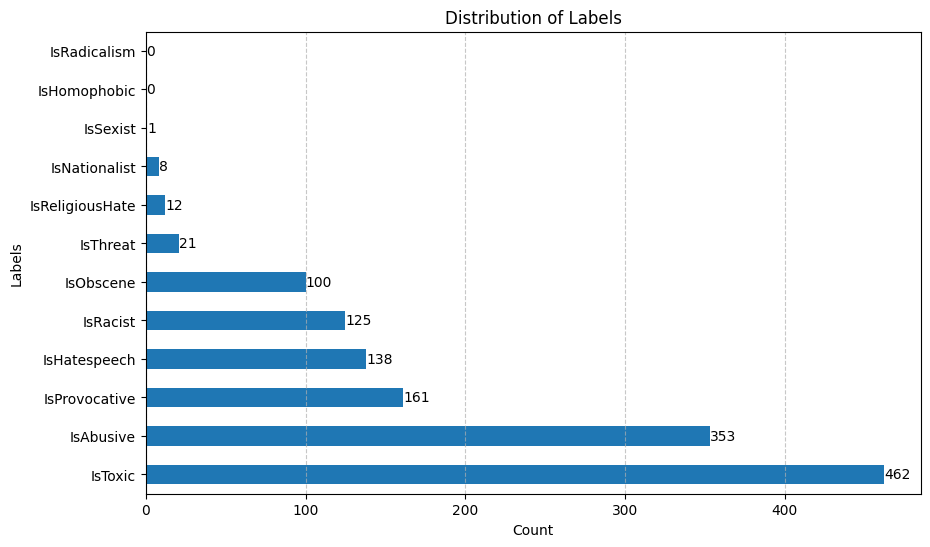

In [9]:
# Contar las ocurrencias de cada etiqueta
label_counts = df.iloc[:, 3:].sum()

# Ordenar los resultados de mayor a menor
label_counts = label_counts.sort_values(ascending=False)

# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = label_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.title('Distribution of Labels')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor en cada barra
for index, value in enumerate(label_counts):
    plt.text(value, index, str(value), va='center', ha='left')

plt.show()



En el gràfico anterior se puede observar que entre todos los tipos de comentarios los que màs se presentan en Youtube son los de contenido tòxico.Esto sugiere que una gran parte de los comentarios en esta muestra son despectivos o agresivos. La prevalencia de estos comentarios tóxicos y abusivos indica que la plataforma podría estar enfrentando problemas significativos relacionados con el discurso dañino. Estas observaciones resaltan la necesidad de mejorar los sistemas de moderación para detectar y mitigar el contenido nocivo en YouTube, asegurando un entorno más seguro y acogedor para los usuarios.

In [10]:
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


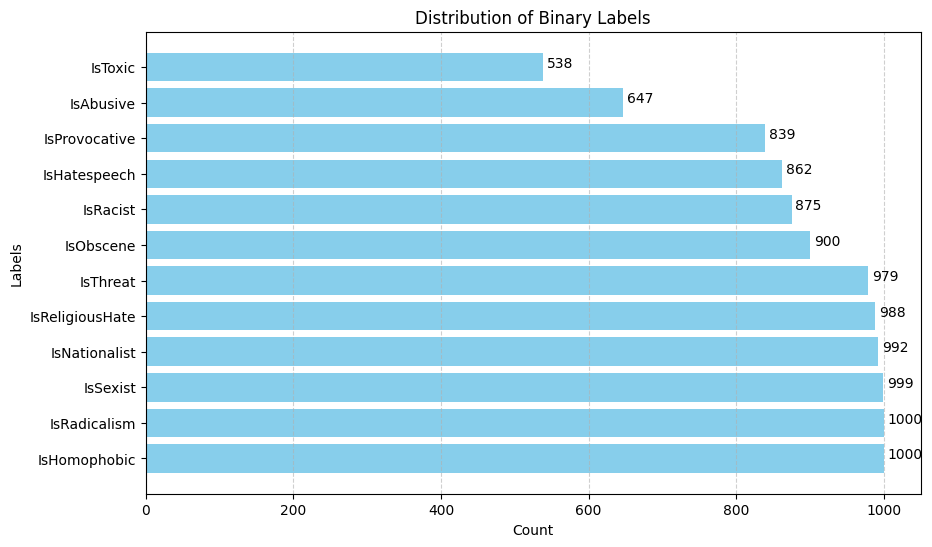

In [11]:
# Crear un DataFrame basado en la estadística descriptiva
data = {
    'Label': ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
              'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist',
              'IsHomophobic', 'IsReligiousHate', 'IsRadicalism'],
    'Count': [538, 647, 979, 839, 900, 862, 875, 992, 999, 1000, 988, 1000]
}

df = pd.DataFrame(data)

# Ordenar los datos de mayor a menor
df_sorted = df.sort_values(by='Count', ascending=False)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Label'], df_sorted['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.title('Distribution of Binary Labels')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar el valor encima de cada barra
for index, value in enumerate(df_sorted['Count']):
    plt.text(value + 5, index, str(value))

plt.show()

Aqui se visualiza cuántos comentarios pertenecen a cada categoría binaria  Se ordenan de mayor a menor para facilitar la interpretación.

**Gràfico de Texto màs Frecuente**


Muestra los comentarios que se repiten más de una vez en el conjunto de datos.





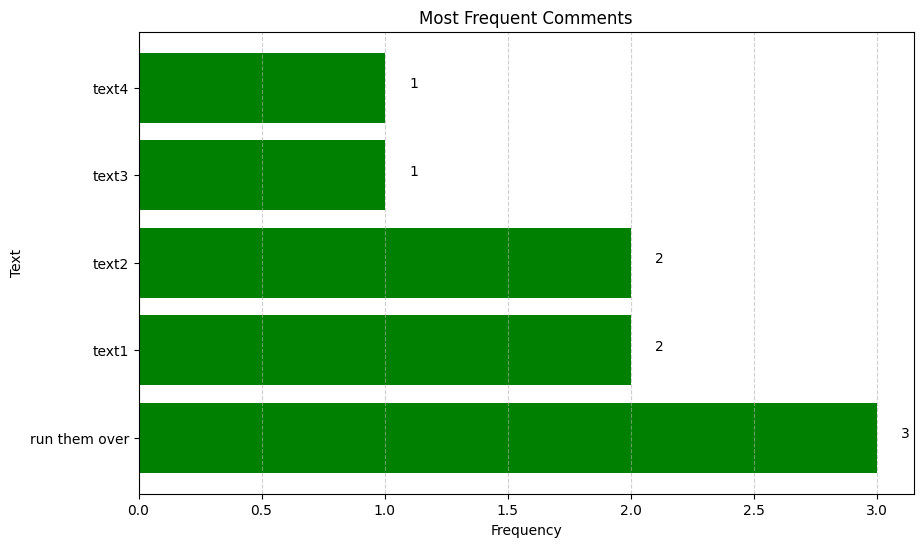

In [12]:
# Crear un DataFrame basado en la frecuencia de los textos (simplificado)
text_data = {
    'Text': ['run them over', 'text1', 'text2', 'text3', 'text4'],
    'Frequency': [3, 2, 2, 1, 1]  # Datos de ejemplo
}

df_text = pd.DataFrame(text_data)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(df_text['Text'], df_text['Frequency'], color='green')
plt.xlabel('Frequency')
plt.ylabel('Text')
plt.title('Most Frequent Comments')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar el valor encima de cada barra
for index, value in enumerate(df_text['Frequency']):
    plt.text(value + 0.1, index, str(value))

plt.show()


# **Correlaciòn**

In [13]:
df = pd.read_csv('comentarios.csv')

In [14]:
df.columns

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')

In [15]:

binary_columns = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
                  'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist',
                  'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

df[binary_columns] = df[binary_columns].apply(pd.to_numeric, errors='coerce')

Matriz de Correlación:
                  IsToxic  IsAbusive  IsThreat  IsProvocative  IsObscene  \
IsToxic          1.000000   0.797086  0.158048       0.472718   0.359707   
IsAbusive        0.797086   1.000000  0.198282       0.593057   0.451277   
IsThreat         0.158048   0.198282  1.000000       0.106626  -0.048820   
IsProvocative    0.472718   0.593057  0.106626       1.000000   0.089788   
IsObscene        0.359707   0.451277 -0.048820       0.089788   1.000000   
IsHatespeech     0.431774  -0.119603  0.002063      -0.072719  -0.027061   
IsRacist         0.407869  -0.121005 -0.034268      -0.075072  -0.035277   
IsNationalist    0.096908  -0.042843 -0.013152      -0.008796  -0.029934   
IsSexist         0.034142   0.042833 -0.004634      -0.013860   0.094916   
IsHomophobic          NaN        NaN       NaN            NaN        NaN   
IsReligiousHate  0.118928  -0.042970  0.111962       0.001699  -0.036736   
IsRadicalism          NaN        NaN       NaN            NaN    

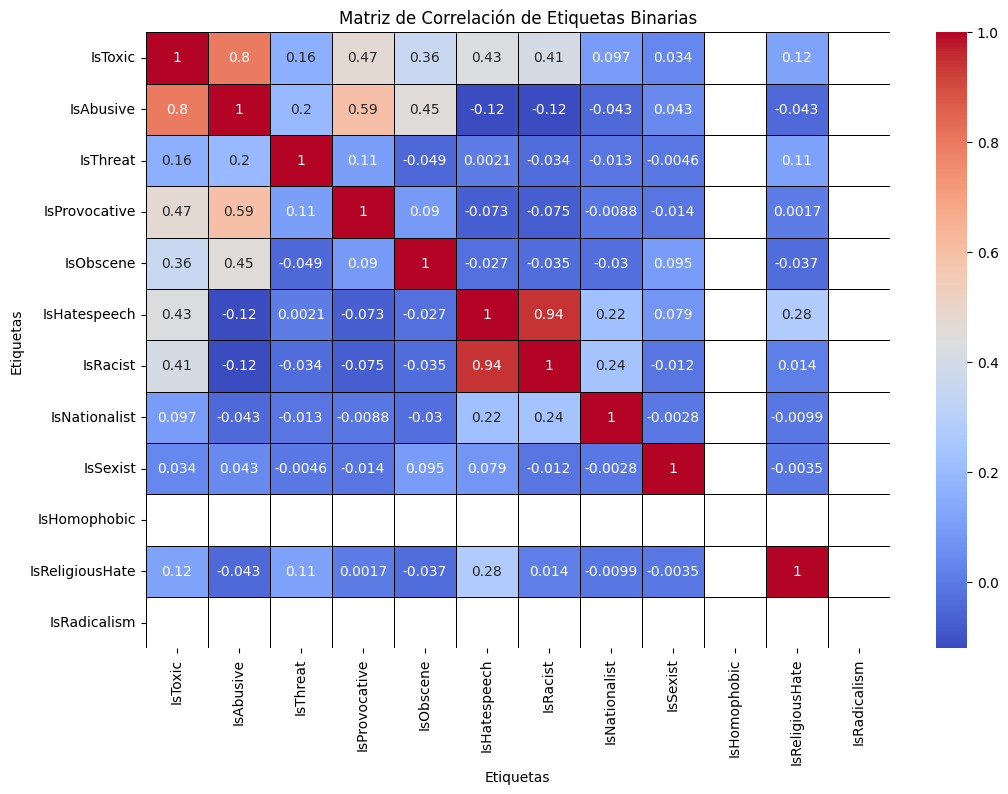

In [16]:

# Generar la matriz de correlación
correlation_matrix = df[binary_columns].corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlación de Etiquetas Binarias')
plt.xlabel('Etiquetas')
plt.ylabel('Etiquetas')
plt.show()

La matriz muestra que ciertas etiquetas como IsToxic, IsAbusive, IsProvocative, IsObscene tienden a agruparse.

 Otras etiquetas como IsRadicalism y IsHomophobic tienden a estar más aisladas en cuanto a correlación, lo que indica que estos tipos de comentarios son menos frecuentes.

# ** Preprocesamiento**

In [17]:
import nltk
import csv
import spacy
import pandas as pd
from unidecode import unidecode
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

#procesamiento de lenguaje
nlp = spacy.load('en_core_web_sm')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [18]:
# Cargar dataset
df = pd.read_csv("comentarios.csv")
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


**Renombrar columnas**

In [19]:
# Renombrar las columnas eliminando el prefijo "Is"
df.columns = [col[2:] if col.startswith('Is') else col for col in df.columns]
df.columns

Index(['CommentId', 'VideoId', 'Text', 'Toxic', 'Abusive', 'Threat',
       'Provocative', 'Obscene', 'Hatespeech', 'Racist', 'Nationalist',
       'Sexist', 'Homophobic', 'ReligiousHate', 'Radicalism'],
      dtype='object')

**Remover puntos o caracteres especiales**

In [20]:
df.columns

Index(['CommentId', 'VideoId', 'Text', 'Toxic', 'Abusive', 'Threat',
       'Provocative', 'Obscene', 'Hatespeech', 'Racist', 'Nationalist',
       'Sexist', 'Homophobic', 'ReligiousHate', 'Radicalism'],
      dtype='object')

In [21]:
df['Text'] = df['Text'].str.replace("[^a-zA-Z#]", " ")

**Remover palabras cortas**

In [22]:
df['Text'] = df['Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

**Convertir todo en minuscula**

In [23]:
df['Text'] = df['Text'].apply(lambda x:x.lower())

# **Tokenizaciòn**

In [24]:
tokenized_text = df['Text'].apply(lambda x: x.split())
tokenized_text.head()

,Text
0,"[only, people, would, just, take, step, back, ..."
1,"[enforcement, trained, shoot, apprehend., they..."
2,"[dont, reckon, them, 'black, lives, matter', b..."
3,"[there, very, large, number, people, like, pol..."
4,"[arab, dude, absolutely, right,, should, have,..."


# **Lemmatizaciòn**

In [25]:
#se define el lemmatizador en una variable
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

wnl = WordNetLemmatizer()

In [26]:
tokenized_text.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))])
tokenized_text.head()

,Text
0,"[only, people, would, just, take, step, back, ..."
1,"[enforcement, trained, shoot, apprehend., they..."
2,"[dont, reckon, them, 'black, lives, matter', b..."
3,"[there, very, large, number, people, like, pol..."
4,"[arab, dude, absolutely, right,, should, have,..."


In [27]:
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])

In [28]:
df['Text'] = tokenized_text


In [29]:
import re

def remove_emojis(text):
    """
    Remueve emojis usando un patrón de regex que identifica caracteres emoji
    """
    if isinstance(text, str):  # Verifica que el texto sea un string
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticones
            u"\U0001F300-\U0001F5FF"  # símbolos & pictogramas
            u"\U0001F680-\U0001F6FF"  # símbolos de transporte & mapas
            u"\U0001F1E0-\U0001F1FF"  # banderas
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub('', text).strip()
    return text  # Retorna el valor original si no es string

# Aplicar la limpieza directamente a la columna 'Text'
df['Text'] = df['Text'].apply(remove_emojis)

In [32]:
# Función para eliminar puntuación del texto
def remove_punctuation(text):
    # Eliminar todos los caracteres que no sean letras o números
    text = re.sub(r'[^\w\s]', '', text)
    return text
# Aplicar la limpieza directamente a la columna 'Text'
df['Text'] = df['Text'].apply(remove_punctuation)


In [33]:
df.head()

,CommentId,VideoId,Text,Toxic,Abusive,Threat,Provocative,Obscene,Hatespeech,Racist,Nationalist,Sexist,Homophobic,ReligiousHate,Radicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,only people would just take step back make thi...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,enforcement trained shoot apprehend they train...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,dont reckon them black lives matter banners be...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,there very large number people like police off...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,arab dude absolutely right should have been sh...,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
df['Text'][3]

'there very large number people like police officers they called criminals reason have police officers fact that criminals like police officers testament good work that police officers protecting public when children family danger hessitate call help call police about time people stopped complaining started give police some respect hard work dedication that often requires them their lives line serve public'

# **Anàlisis de sentimiento**

In [35]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inicializar el analizador de sentimiento de VADE
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# **Clasificaciòn de sentimientos en positivo, negativo, neutros.**

In [36]:
!pip install vaderSentiment -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inicializar el analizador de sentimiento
sia = SentimentIntensityAnalyzer()

def determine_sentiment(row):
    # Listado de columnas que indican toxicidad
    negative_columns = ['Toxic', 'Abusive', 'Threat', 'Provocative', 'Obscene',
                        'Hatespeech', 'Racist', 'Nationalist', 'Sexist',
                        'Homophobic', 'ReligiousHate', 'Radicalism']

    # Si alguna de las columnas de toxicidad es True, clasificar como "Negative"
    if row[negative_columns].any():
        return 'Negative'

    # Si todas son False, determinar el sentimiento basado en el análisis de polaridad
    sentiment_score = sia.polarity_scores(row['Text'])['compound']

    # Clasificar como "Positive" o "Negative" según el puntaje de polaridad
    return 'Positive' if sentiment_score > 0 else 'Negative'

# Aplicar la función al DataFrame
df['Sentiment'] = df.apply(determine_sentiment, axis=1)

# Mostrar algunas filas para verificar el resultado
print(df[['Text', 'Sentiment']].head())

                                                Text Sentiment
0  only people would just take step back make thi...  Negative
1  enforcement trained shoot apprehend they train...  Negative
2  dont reckon them black lives matter banners be...  Negative
3  there very large number people like police off...  Negative
4  arab dude absolutely right should have been sh...  Negative


In [38]:
df.head()

,CommentId,VideoId,Text,Toxic,Abusive,Threat,Provocative,Obscene,Hatespeech,Racist,Nationalist,Sexist,Homophobic,ReligiousHate,Radicalism,Sentiment
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,only people would just take step back make thi...,False,False,False,False,False,False,False,False,False,False,False,False,Negative
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,enforcement trained shoot apprehend they train...,True,True,False,False,False,False,False,False,False,False,False,False,Negative
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,dont reckon them black lives matter banners be...,True,True,False,False,True,False,False,False,False,False,False,False,Negative
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,there very large number people like police off...,False,False,False,False,False,False,False,False,False,False,False,False,Negative
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,arab dude absolutely right should have been sh...,False,False,False,False,False,False,False,False,False,False,False,False,Negative


In [39]:
df['Sentiment'].unique()

array(['Negative', 'Positive'], dtype=object)

In [40]:
negative_comments = df[df['Sentiment'] == 'Negative'].count()
positive_comments = df[df['Sentiment'] == 'Positive'].count()


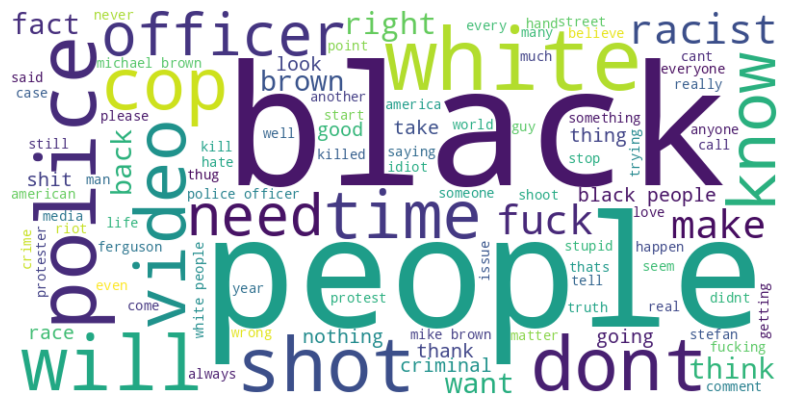

In [41]:
from wordcloud import WordCloud

# Unir todo el texto en una sola cadena
text = ' '.join(df['Text'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400,
                     background_color='white',
                     max_words=100).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
# Eliminar las columnas 'Unnamed: 0', 'CommentId', 'VideoId'
df = df.drop(['CommentId', 'VideoId'], axis=1)

# Guardar el DataFrame resultante en un archivo CSV
df.to_csv('comment_analized.csv', index=False)

# Confirmación
print("CSV guardado correctamente")

CSV guardado correctamente
